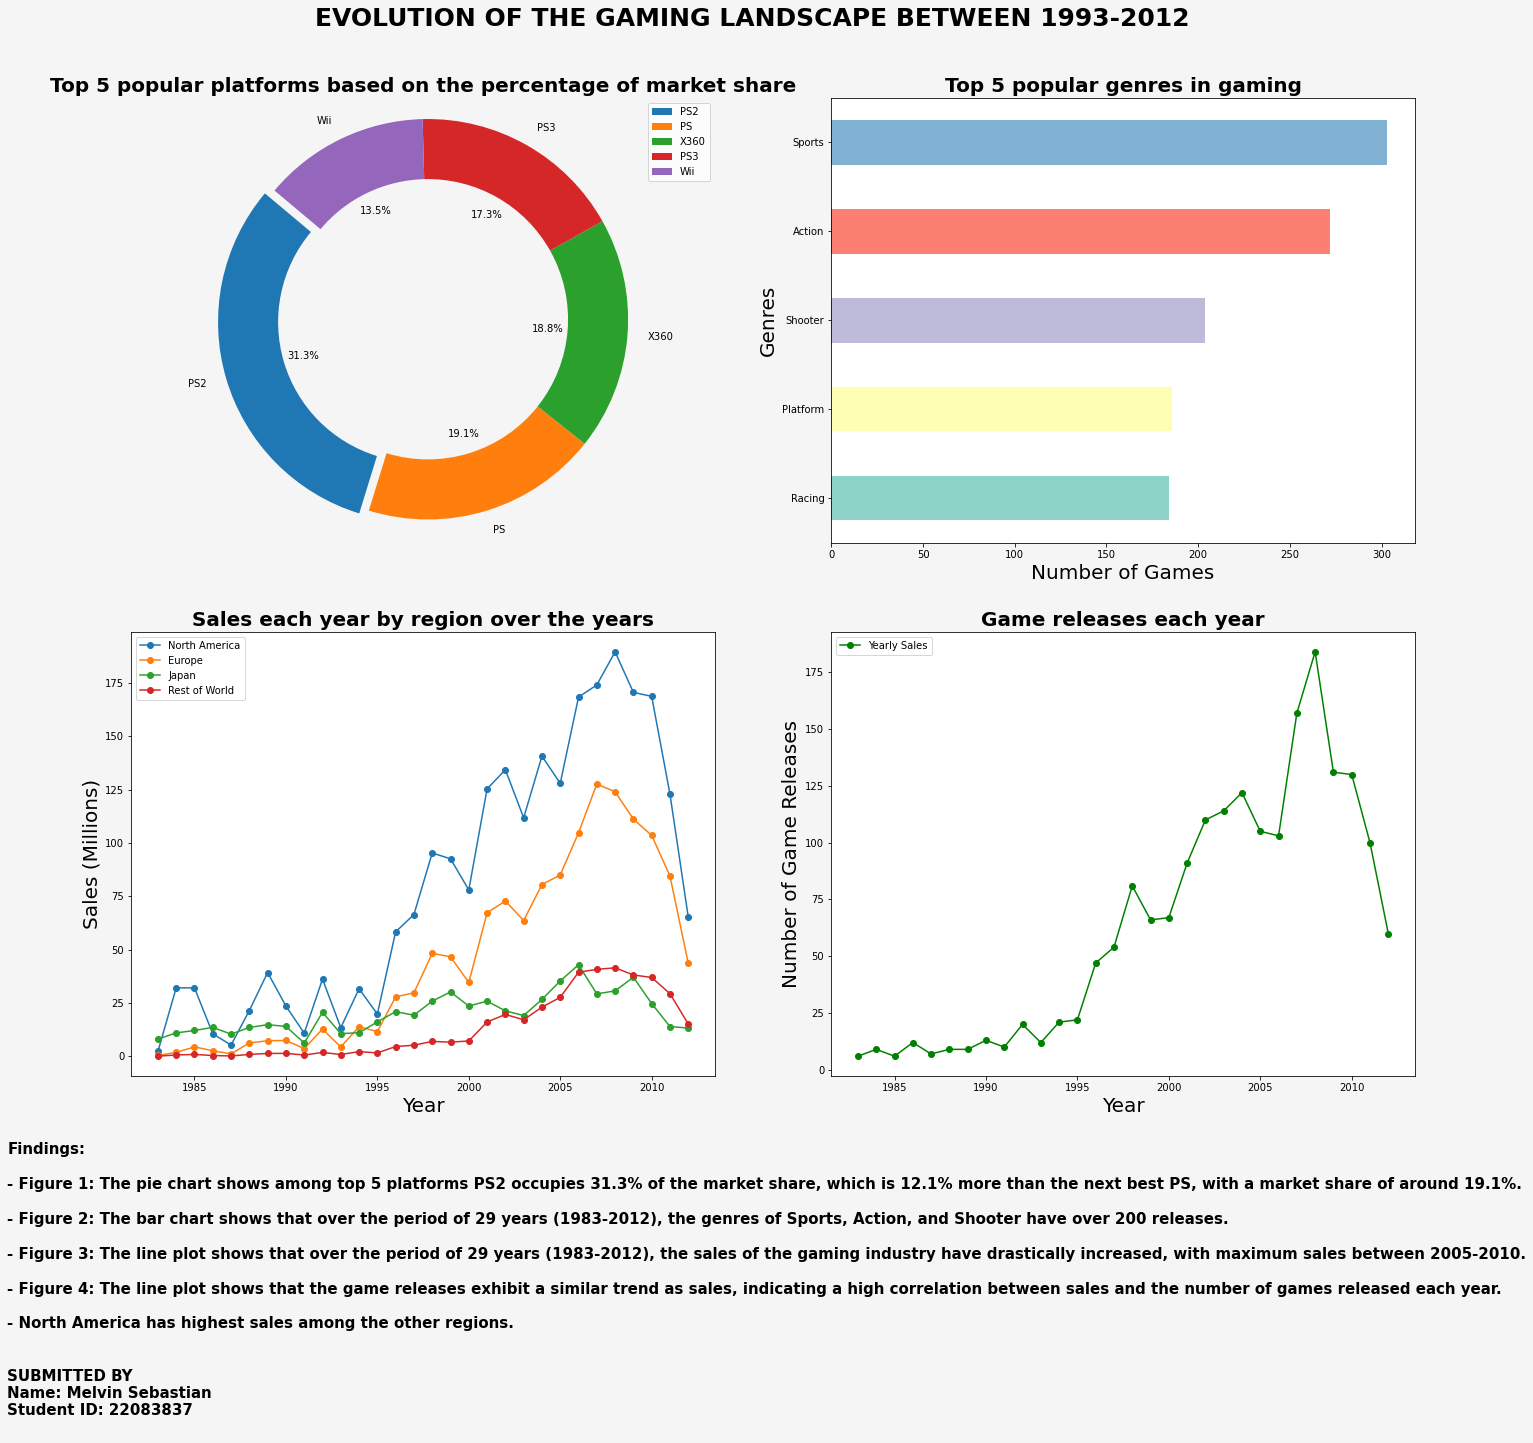

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Video Games Sales.csv')
df = df.dropna(subset = ['Year', 'Publisher'])
df.head()

fig, axs = plt.subplots(2, 2, figsize=(23, 18), facecolor='#F5F5F5')

top_platforms = df['Platform'].value_counts().head(5)
explode = (0.05, 0, 0, 0, 0)
axs[0, 0].pie(top_platforms, labels=top_platforms.index, autopct='%1.1f%%', startangle=140, 
              explode=explode, wedgeprops=dict(width=0.3))
axs[0, 0].axis('equal')
axs[0, 0].set_title('Top 5 popular platforms based on the percentage of market share', fontsize=20, fontweight='bold')
axs[0, 0].legend()

top_genres = df['Genre'].value_counts().head(5)
bar_colors = plt.cm.Set3(np.arange(len(top_genres)))
top_genres.sort_values().plot(kind='barh', color=bar_colors, ax=axs[0, 1])
axs[0, 1].set_xlabel('Number of Games', fontsize=20)
axs[0, 1].set_ylabel('Genres', fontsize=20)
axs[0, 1].set_title('Top 5 popular genres in gaming', fontsize=20, fontweight='bold')

sales_by_year = df.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
axs[1, 0].plot(sales_by_year.index, sales_by_year['North America'], label='North America', marker='o')
axs[1, 0].plot(sales_by_year.index, sales_by_year['Europe'], label='Europe', marker='o')
axs[1, 0].plot(sales_by_year.index, sales_by_year['Japan'], label='Japan', marker='o')
axs[1, 0].plot(sales_by_year.index, sales_by_year['Rest of World'], label='Rest of World', marker='o')
axs[1, 0].set_xlabel('Year', fontsize=20)
axs[1, 0].set_ylabel('Sales (Millions)', fontsize=20)
axs[1, 0].set_title('Sales each year by region over the years', fontsize=20, fontweight='bold')
axs[1, 0].legend()

game_releases_by_year = df.groupby('Year')['Game Title'].count()
axs[1, 1].plot(game_releases_by_year.index, game_releases_by_year, label='Yearly Sales', marker='o', color='green')
axs[1, 1].set_xlabel('Year', fontsize=20)
axs[1, 1].set_ylabel('Number of Game Releases', fontsize=20)
axs[1, 1].set_title('Game releases each year', fontsize=20, fontweight='bold')
axs[1, 1].legend()

findings_text = """
Findings:

- Figure 1: The pie chart shows among top 5 platforms PS2 occupies 31.3% of the market share, which is 12.1% more than the next best PS, with a market share of around 19.1%.

- Figure 2: The bar chart shows that over the period of 29 years (1983-2012), the genres of Sports, Action, and Shooter have over 200 releases.

- Figure 3: The line plot shows that over the period of 29 years (1983-2012), the sales of the gaming industry have drastically increased, with maximum sales between 2005-2010.

- Figure 4: The line plot shows that the game releases exhibit a similar trend as sales, indicating a high correlation between sales and the number of games released each year.

- North America has highest sales among the other regions.


SUBMITTED BY
Name: Melvin Sebastian
Student ID: 22083837
"""

fig.text(0.05, -0.15, findings_text, fontsize=15, va='baseline', fontweight='bold')
plot_sub_title = """EVOLUTION OF THE GAMING LANDSCAPE BETWEEN 1993-2012"""
fig.suptitle(plot_sub_title, fontsize=25, y=0.95, fontweight='bold')
plt.show()

# Data source: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-and-reviews